In [209]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_pickle('txn_data_frame/txn_dataframe.pickle')

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()

total = sender + receiver

new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
cuenta = []
differ = []
counter = 0
for i in range(len(sender)):
  if sender[i] == receiver[i]:
    cuenta.append(sender[i])
#print(cuenta[0],cuenta.count(cuenta[0]), len(cuenta))

for i in range(len(cuenta)):
  if cuenta[i] != 'C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD3X62DNWELS34':
    #print(cuenta[i])
    differ.append(cuenta[i])





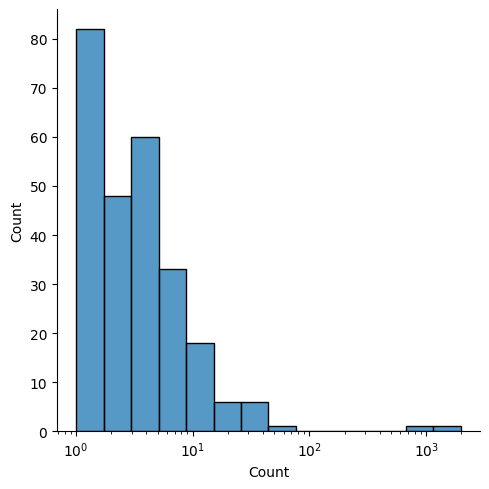

,Sender Address,Count
254,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,1981
62,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,983
188,RTERLKZRA47QP5GUBHKXBG6TUGPJMLIHY5YNMFN3VLVTER...,52
24,4ZK3UPFRJ643ETWSWZ4YJXH3LQTL2FUEI6CIT7HEOVZL6J...,44
86,FMBXOFAQCSAD4UWU4Q7IX5AV4FRV6AKURJQYGXLW3CTPTQ...,41
40,7GOSR4OVOLWWPWT535HTEK3P5N6PWNPMUZRK5ONRDOZD2I...,36
226,XFYAYSEGQIY2J3DCGGXCPXY5FGHSVKM3V4WCNYCLKDLHB7...,32
26,54AYZUNBVABFMKOMJBDVKI7OKV3WUBQFDZIXTQDUIYPHWI...,29
163,OCRYIWGJW23U7XHGB6TLNFGIA4XZDOXEH7ZJRGKHZ725P3...,26
124,J4BJWP67LHXT7LQTWZYWJGNSB25VZMO6SFZPKBSY7HJUCX...,24


In [195]:
#Grafico de frecuencia para senders

senders = df[['Sender Address', 'Transaction Type']]
senders

new_df = senders.groupby(['Sender Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
#new_df


sb.displot(new_df, x = 'Count', log_scale=True)
plt.show()

f_new_df = new_df[:10]
f_new_df

#sb.barplot(data = f_new_df, x='Sender Address', y = 'Count')





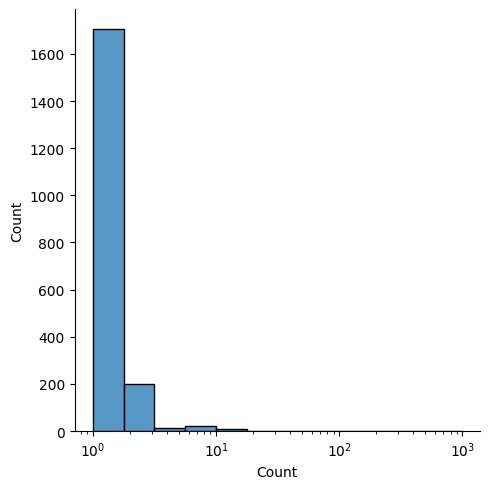

<AxesSubplot: xlabel='Receiver Address', ylabel='Count'>

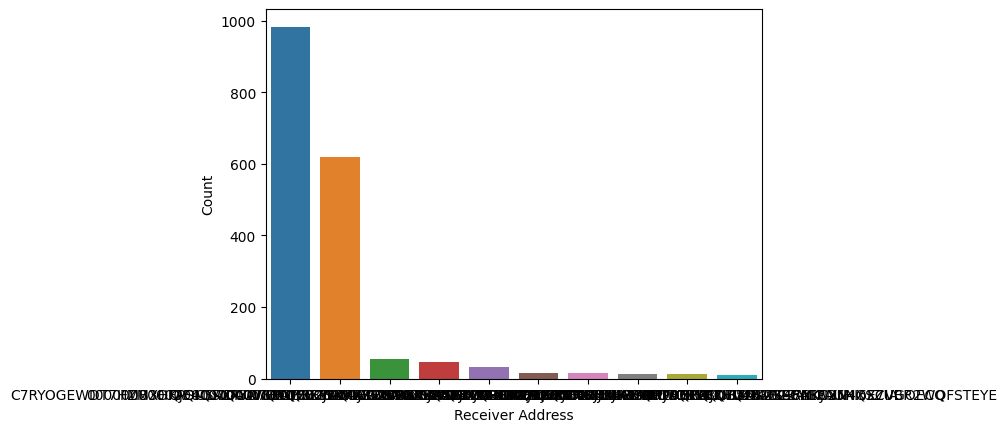

In [208]:
#Grafico de frecuencia para receivers


receivers = df[['Receiver Address', 'Transaction Type']]
receivers

new_df2 = receivers.groupby(['Receiver Address'])['Receiver Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
new_df2

sb.displot(new_df2, x = 'Count', log_scale = True)
#plt.ylim(0, 600)
plt.show()

f_new_df2 = new_df2[:10]
f_new_df2
sb.barplot(data = f_new_df2, x='Receiver Address', y = 'Count')

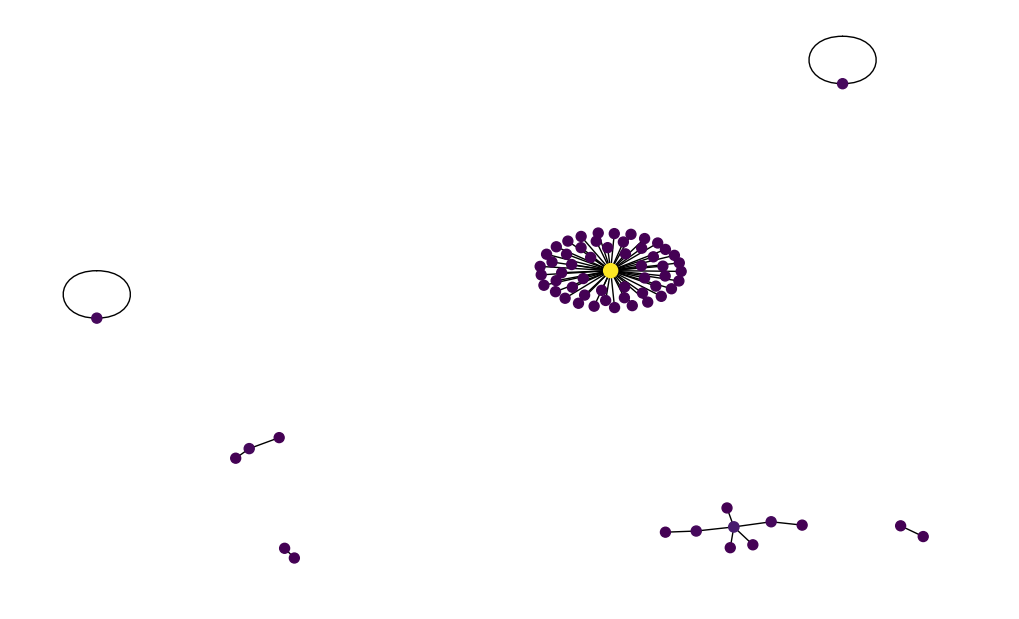

In [171]:
G = nx.Graph()

df_new = df[3000:3100]
G = nx.from_pandas_edgelist(df_new,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
#nx.draw_networkx(G, with_labels=False)


node_color = [float(G.degree(v)) for v in G]

nx.draw(
    G,
    node_size = [float(G.degree(v)) + 50 for v in G],
    node_color=node_color,
    with_labels=False,
)

# # nx.draw_shell(G)
